In [1]:
import sys
sys.path.insert(1, '../')
import pandas as pd
import matplotlib.pylab as gr
small={'family' : 'normal','weight' : 'normal','size'   : 8}
medium={'family' : 'normal','weight' : 'normal','size'   : 10}
large={'family' : 'normal','weight' : 'bold','size'   : 13}
gr.rc('font', size=small['size'], weight='normal')          # controls default text sizes
gr.rc('axes', titlesize=medium['size'])     # fontsize of the axes title
gr.rc('axes', labelsize=medium['size'])    # fontsize of the x and y labels
gr.rc('xtick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('ytick', labelsize=small['size'])    # fontsize of the tick labels
gr.rc('legend', fontsize=small['size'])    # legend fontsize
gr.rc('figure', titlesize=large['size'])  # fontsize of the figure title
%matplotlib inline 


In [2]:
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()


Loading BokehJS ...

In [3]:
def openCSV_DB(path,comp='zip',enc='latin-1'):
    data=pd.read_csv(path, compression=comp,encoding=enc)
    print('Data obtained from %s'%path)
    return data

locs_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv'
tcMill_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases_per_million.csv'
tdMill_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths_per_million.csv'
tc_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases.csv'
td_url='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv'
#
locs= openCSV_DB(path= locs_url, comp=None)
tc = openCSV_DB(path= tc_url, comp=None)
td = openCSV_DB(path= td_url, comp=None)
tcMill = openCSV_DB(path= tcMill_url, comp=None)
tdMill = openCSV_DB(path= tdMill_url, comp=None)

Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv
Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases.csv
Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv
Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases_per_million.csv
Data obtained from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths_per_million.csv


## Quick data descriptions from the data frames

In [36]:
locs.head(10)

,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0
5,Anguilla,Anguilla,North America,2020.0,15002.0
6,Antigua_and_Barbuda,Antigua and Barbuda,North America,2020.0,97928.0
7,Argentina,Argentina,South America,2020.0,45195777.0
8,Armenia,Armenia,Asia,2020.0,2963234.0
9,Aruba,Aruba,North America,2020.0,106766.0


In [41]:
locs.columns

Index([u'countriesAndTerritories', u'location', u'continent',
       u'population_year', u'population'],
      dtype='object')

In [29]:
tcMill.describe()

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
count,127.000000,117.000000,58.000000,122.000000,53.000000,45.000000,40.000000,47.000000,60.000000,118.000000,...,42.000000,52.000000,51.000000,52.000000,52.000000,123.000000,10.000,26.000000,48.000000,46.000000
mean,87.453717,8.402735,126.054155,17.168410,6087.845189,0.524689,188.308025,166.209830,38.582483,145.655076,...,443.024048,113.057404,26.313235,7963.297596,6.426904,0.995252,10.045,0.091885,2.748063,1.164391
std,132.945803,16.490128,92.869278,28.902691,3488.395547,0.301946,25.650123,89.345271,34.631632,227.420575,...,143.717630,56.361765,24.077317,4120.895625,3.733752,1.155160,0.000,0.114138,1.917125,0.782979
min,0.003000,0.000000,0.695000,0.000000,12.942000,0.061000,133.316000,10.212000,0.022000,0.000000,...,162.799000,1.727000,0.179000,1236.094000,0.352000,0.000000,10.045,0.034000,0.109000,0.067000
25%,1.397000,0.000000,31.881750,0.000000,2899.113000,0.243000,199.973000,71.481000,4.607500,0.000000,...,383.057000,68.514000,3.540500,6180.470000,4.079500,0.036000,10.045,0.034000,1.822250,0.538000
50%,11.657000,0.026000,128.223000,0.045500,7299.553000,0.578000,199.973000,214.443000,33.244500,0.000000,...,488.398000,123.642500,17.389000,9888.752000,5.943500,0.164000,10.045,0.034000,2.176000,0.942000
75%,134.313000,7.681000,201.021750,28.072000,9279.752000,0.761000,199.973000,245.078000,65.326750,273.012750,...,517.127000,156.748000,50.912500,11124.845000,10.049250,2.471000,10.045,0.034000,4.052250,1.934250
max,454.691000,74.342000,279.033000,105.995000,9706.853000,1.065000,199.973000,255.290000,107.842000,846.035000,...,632.045000,189.134000,65.403000,13597.033000,12.695000,2.784000,10.045,0.402000,7.452000,2.288000


In [56]:
tcMill.tail(10)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,Yemen,Zambia,Zimbabwe
117,2020-04-26,363.415,37.582,247.411,74.251,9486.831,0.761,199.973,245.078,83.348,...,526.704,171.574,55.723,11124.845,11.359,2.774,10.045,0.034,4.569,2.086
118,2020-04-27,374.093,39.329,252.276,77.125,9577.428,0.791,199.973,245.078,83.348,...,526.704,174.452,56.380,11124.845,11.429,2.774,10.045,0.034,4.787,2.086
119,2020-04-28,382.504,43.747,255.751,80.203,9616.256,0.822,199.973,245.078,88.283,...,565.010,178.483,56.888,11124.845,11.570,2.774,10.045,0.034,4.841,2.153
120,2020-04-29,391.852,46.932,260.616,83.214,9616.256,0.822,199.973,245.078,91.026,...,565.010,179.922,57.934,11124.845,11.570,2.774,10.045,0.034,5.168,2.153
121,2020-04-30,401.741,50.066,266.176,87.752,9616.256,0.822,199.973,245.078,94.522,...,632.045,181.361,59.816,12360.939,11.640,2.774,10.045,0.201,5.276,2.288
122,2020-05-01,412.578,55.769,268.608,91.355,9642.141,0.822,199.973,245.078,97.686,...,632.045,185.104,61.131,13597.033,11.711,2.774,10.045,0.201,5.766,2.288
123,2020-05-02,424.509,59.982,271.735,94.730,9655.083,0.882,199.973,255.290,99.987,...,632.045,186.543,62.565,13597.033,11.781,2.774,10.045,0.235,5.929,2.288
124,2020-05-03,434.848,63.424,274.168,97.945,9668.026,1.065,199.973,255.290,103.284,...,632.045,187.695,63.551,13597.033,12.133,2.774,10.045,0.335,6.473,2.288
125,2020-05-04,444.856,69.461,276.253,102.027,9680.968,1.065,199.973,255.290,105.541,...,632.045,188.558,64.208,13597.033,12.555,2.784,10.045,0.335,6.745,2.288
126,2020-05-05,454.691,74.342,279.033,105.995,9706.853,1.065,199.973,255.290,107.842,...,632.045,189.134,65.403,13597.033,12.695,2.784,10.045,0.402,7.452,2.288


In [65]:
totCasesMill_Belgium= tcMill['Belgium'].to_numpy()
totCasesMill= tcMill.iloc[:,2:].to_numpy()
dates= tcMill.iloc[:,0].to_numpy()
totCasesMill.shape

(127, 209)

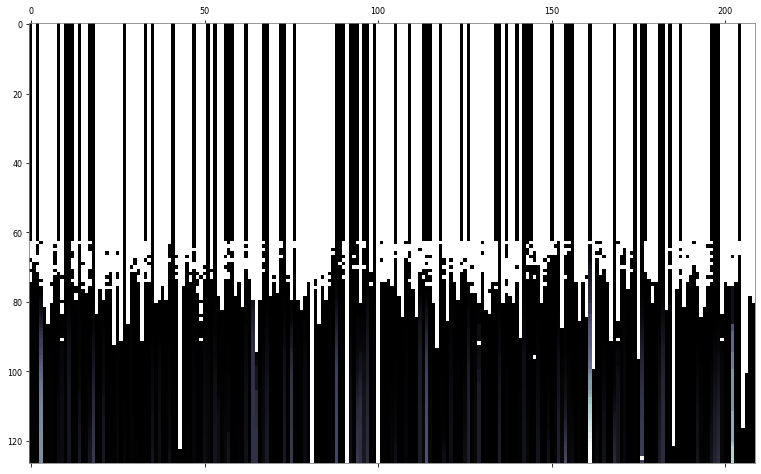

In [7]:
f1 = gr.figure(figsize=(13,9)); rows=1; cols=1; gr.ioff()
ax= f1.add_subplot(rows,cols,1)
ax.matshow(tcMill.iloc[:,2:],cmap='bone')
gr.ion(); gr.draw()

In [25]:
dataOWD[u'Country',u'Total confirmed cases of COVID-19 per million people']

KeyError: (u'Country', u'Total confirmed cases of COVID-19 per million people')

In [20]:

tccMill= dataOWD[u'Total confirmed cases of COVID-19 per million people'].to_numpy()
tcdMill= dataOWD[u'Total confirmed deaths due to COVID-19 per million people'].to_numpy()
print(type(tccMill))


<type 'numpy.ndarray'>


In [12]:
p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(datetime(tccMill, color='#A6CEE3', legend_label='AAPL')
        output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1]], plot_width=400, plot_height=400)) 

In [ ]:


def datetime(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title="Stock Closing Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(datetime(AAPL['date']), AAPL['adj_close'], color='#A6CEE3', legend_label='AAPL')
p1.line(datetime(GOOG['date']), GOOG['adj_close'], color='#B2DF8A', legend_label='GOOG')
p1.line(datetime(IBM['date']), IBM['adj_close'], color='#33A02C', legend_label='IBM')
p1.line(datetime(MSFT['date']), MSFT['adj_close'], color='#FB9A99', legend_label='MSFT')
p1.legend.location = "top_left"

aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

p2 = figure(x_axis_type="datetime", title="AAPL One-Month Average")
p2.grid.grid_line_alpha = 0
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.ygrid.band_fill_color = "olive"
p2.ygrid.band_fill_alpha = 0.1

p2.circle(aapl_dates, aapl, size=4, legend_label='close',
          color='darkgrey', alpha=0.2)

p2.line(aapl_dates, aapl_avg, legend_label='avg', color='navy')
p2.legend.location = "top_left"

output_file("stocks.html", title="stocks.py example")

show(gridplot([[p1,p2]], plot_width=400, plot_height=400))  # open a browser
